<div align="center">
    <img src="../../Images/javeriana.PNG" width="800" height="600">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**


## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [4]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "ï": "i",
    "£": "$",
    "à":"a",
    "è": "e",
    "ì": "i",
    "ò": "o",
    "ù": "u",
    "®": "",
    "ä": "a",
    "ë": "é",
    "ï": "i",
    "ö": "o",
    "ü": "u",
    "Bouvetøya":"Bouvet",
    " \' ":"'",
    "\'":"'",
    "¹":"'",
    "â":"a",
    "ê":"e",
    "î":"i",
    "ô":"o",
    "û":"u",
    "å": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u",
    "á": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [5]:
# comentado 2 ### comentado


# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "bullard\'s": "bullards",
    "world\'s":"worlds",
    "avery\'s":"averys",
    "wallet\'s":"wallets",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "brother\'s": "brothers",
    "sister\'s": "sisters",
    "haakon\'s": "haakons",
    "king\'s": "kings",
    "queen\'s": "queens",
    "family\'s": "families",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "it\'s": "its",
    "won\'t":"wont",
    "weyland\'s": "weylands",
    "didn\'t": "didnt"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Función para limpiar el texto
def clean_text(text):
    # Convertir en minúsculas
    text = text.lower()
    return text

# Aplicar la función de limpieza a la columna de trama de tus DataFrames
dataTraining['plot'] = dataTraining['plot'].apply(clean_text)


In [7]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [8]:
import pandas as pd
import re

def corregir_espacios_s(texto):
    # Patrón para identificar " palabra s "
    patron = r"\b(\w+)\s+s\b"
    # Reemplazar con "palabra's"
    texto_corregido = re.sub(patron, r"\1's", texto)
    return texto_corregido

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(corregir_espacios_s)

In [9]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "u. s.": "u.s.",
    "dr. t. ": "dr.",
    "!!": "!",
    "_": " "
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [10]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


**Importación de Librerías**

- **Numpy:** Para operaciones matemáticas y manejo de arrays.
- **Gensim:** Para cargar el modelo preentrenado de GloVe.
- **TensorFlow y Keras:** Para construir y entrenar el modelo de red neuronal.
- **Scikit-learn:** Para preprocesamiento de etiquetas y división de datos.

In [ ]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

**Carga del Modelo GloVe**

Se carga un modelo de GloVe preentrenado (glove-wiki-gigaword-100) usando Gensim. GloVe es un algoritmo de representación de palabras en vectores, donde cada palabra se mapea a un vector en un espacio dimensional. El modelo cargado será utilizado para convertir palabras en vectores.

In [ ]:
# Cargar el modelo GloVe
model_glove = api.load("glove-wiki-gigaword-100")

**Preprocesamiento de Datos**

- **Tokenización:** Se convierten los textos a secuencias de tokens (palabras) utilizando un Tokenizer, limitando el vocabulario a las 10,000 palabras más frecuentes y marcando las palabras fuera del vocabulario con <OOV>.
- **Padding:** Las secuencias de tokens se normalizan a una longitud estándar (100 tokens) para asegurar que todas las entradas al modelo tengan el mismo tamaño.

In [ ]:
# Parámetros de tokenización y secuencias
vocab_size = 10000  # Tamaño del vocabulario
max_length = 100    # Longitud máxima de las secuencias
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

**Mapeo a Embeddings de GloVe**

Se define una función map_to_glove para mapear cada secuencia de tokens a su correspondiente vector de embedding de GloVe, transformando así el conjunto de datos a una forma que el modelo puede procesar.

**Preparación de las Etiquetas**
Se utiliza MultiLabelBinarizer para transformar las etiquetas categóricas (géneros) en un formato binario adecuado para la clasificación multietiqueta.

In [ ]:
# Función para mapear secuencias a embeddings de GloVe
def map_to_glove(sequence):
    embeddings = np.zeros((max_length, 100))
    for i, idx in enumerate(sequence):
        if i >= max_length:
            break
        if idx != 0:
            word = tokenizer.index_word.get(idx, None)
            if word and word in model_glove:
                embeddings[i] = model_glove[word]
    return embeddings

# Transformar todas las secuencias con map_to_glove
X_transformed = np.array([map_to_glove(seq) for seq in padded_sequences])

# Inicializar el MultiLabelBinarizer y ajustar y transformar los géneros
mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(dataTraining['genres'])
outputClasses = y_genres.shape[1]

**División de Datos**

Los datos transformados se dividen en conjuntos de entrenamiento y prueba usando train_test_split.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_transformed, y_genres, test_size=0.20, random_state=42)


**Construcción del Modelo**
Se construye un modelo secuencial con Keras que incluye:

- Una capa Conv1D para aprender patrones espaciales en los datos de texto.
- Capas Dropout para reducir el sobreajuste.
- Una capa GlobalMaxPooling1D para reducir la dimensionalidad de los datos.
- Capas Dense para la clasificación, incluyendo una capa de salida con activación sigmoid para clasificación multietiqueta.

**Entrenamiento del Modelo**
El modelo se entrena con los datos, utilizando EarlyStopping para detener el entrenamiento si el val_loss no mejora después de un número determinado de épocas.

In [38]:

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    verbose=1,
    restore_best_weights=False
)

# Construir el modelo
model = Sequential()
model.add(Conv1D(100, 2, padding='same', activation='relu', input_shape=(max_length, 100)))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(outputClasses, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo incluyendo el callback de EarlyStopping
history = model.fit(
    X_train,
    y_train_genres,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Realizar predicciones en el conjunto de prueba con el modelo
y_pred_genres_prob = model.predict(X_test)

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score: {auc_score}")


Epoch 1/300
158/158 [==============================] - 2s 6ms/step - loss: 0.5173 - accuracy: 0.1756 - val_loss: 0.4452 - val_accuracy: 0.0411
Epoch 2/300
158/158 [==============================] - 1s 5ms/step - loss: 0.4523 - accuracy: 0.0503 - val_loss: 0.4406 - val_accuracy: 0.0506
Epoch 3/300
158/158 [==============================] - 1s 5ms/step - loss: 0.4475 - accuracy: 0.0536 - val_loss: 0.4381 - val_accuracy: 0.0506
Epoch 4/300
158/158 [==============================] - 1s 5ms/step - loss: 0.4437 - accuracy: 0.0491 - val_loss: 0.4351 - val_accuracy: 0.0380
Epoch 5/300
158/158 [==============================] - 1s 5ms/step - loss: 0.4387 - accuracy: 0.0479 - val_loss: 0.4317 - val_accuracy: 0.0364
Epoch 6/300
158/158 [==============================] - 1s 5ms/step - loss: 0.4329 - accuracy: 0.0521 - val_loss: 0.4270 - val_accuracy: 0.0720
Epoch 7/300
158/158 [==============================] - 1s 6ms/step - loss: 0.4280 - accuracy: 0.0624 - val_loss: 0.4234 - val_accuracy: 0.0728

se utiliza para visualizar el comportamiento del error (loss) durante el proceso de entrenamiento y validación de un modelo de aprendizaje profundo, con el objetivo de facilitar la identificación de cómo está aprendiendo el modelo a lo largo de las épocas.|

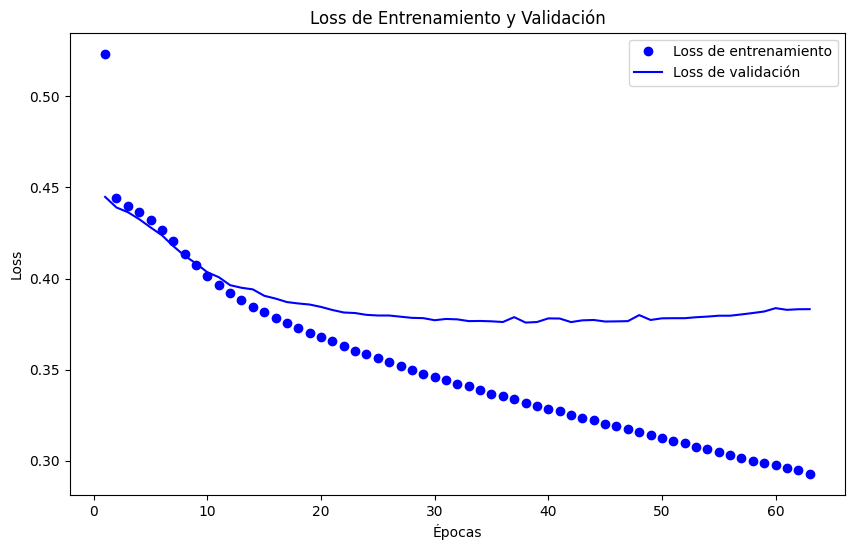

In [34]:
import matplotlib.pyplot as plt

# Extracción de los valores de loss de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']

# Definir el número de épocas para ajustar el eje x de la gráfica
epochs = range(1, len(loss) + 1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Loss de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Loss de validación')
plt.title('Loss de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()


Este código define y utiliza una función para calcular el promedio macro del área bajo la curva de la característica operativa del receptor (AUC ROC) para tareas de clasificación multietiqueta, y luego compara este resultado con el AUC ROC micro calculado directamente con la función roc_auc_score de scikit-learn.

In [39]:
from sklearn.metrics import roc_auc_score

# Función para calcular el AUC ROC macro manualmente
def calculate_auc_macro(y_true, y_pred):
    n_classes = y_true.shape[1]
    auc_scores = []

    for i in range(n_classes):
        # Extrae la i-ésima columna para la clase actual
        y_true_i = y_true[:, i]
        y_pred_i = y_pred[:, i]

        # Verifica que haya más de una clase presente
        if len(np.unique(y_true_i)) > 1:
            auc_score = roc_auc_score(y_true_i, y_pred_i)
            auc_scores.append(auc_score)

    # Calcula el promedio de los AUCs calculados, maneja el caso de no tener AUCs
    if auc_scores:
        auc_macro = np.mean(auc_scores)
    else:
        # Retorna NaN o podrías optar por retornar None o alguna otra indicación de no disponibilidad
        auc_macro = np.nan

    return auc_macro

# Calcular AUC ROC scores
auc_score_micro = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
auc_score_macro = calculate_auc_macro(y_test_genres, y_pred_genres_prob)

print(f"ROC AUC Score (micro): {auc_score_micro}")
print(f"ROC AUC Score (macro): {auc_score_macro}")


ROC AUC Score (micro): 0.9041547117990152
ROC AUC Score (macro): 0.7616613017121575


Este código realiza la generación y visualización de las curvas Característica Operativa del Receptor (ROC) y el cálculo del área bajo la curva (AUC) para un modelo de clasificación multietiqueta. 

**Visualización**
Genera un gráfico que incluye:
- La curva ROC micro-promedio, mostrando el rendimiento global del modelo.
- La curva ROC macro-promedio, mostrando el rendimiento promedio del modelo a través de todas las clases.
- Las curvas ROC para cada clase individual, permitiendo la inspección del rendimiento del modelo en clases específicas.
- Configura el gráfico con una línea de referencia (diagonal punteada), límites para los ejes, etiquetas, y un título.
- Muestra el gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
<ipython-input-40-1db6d65766cb>:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


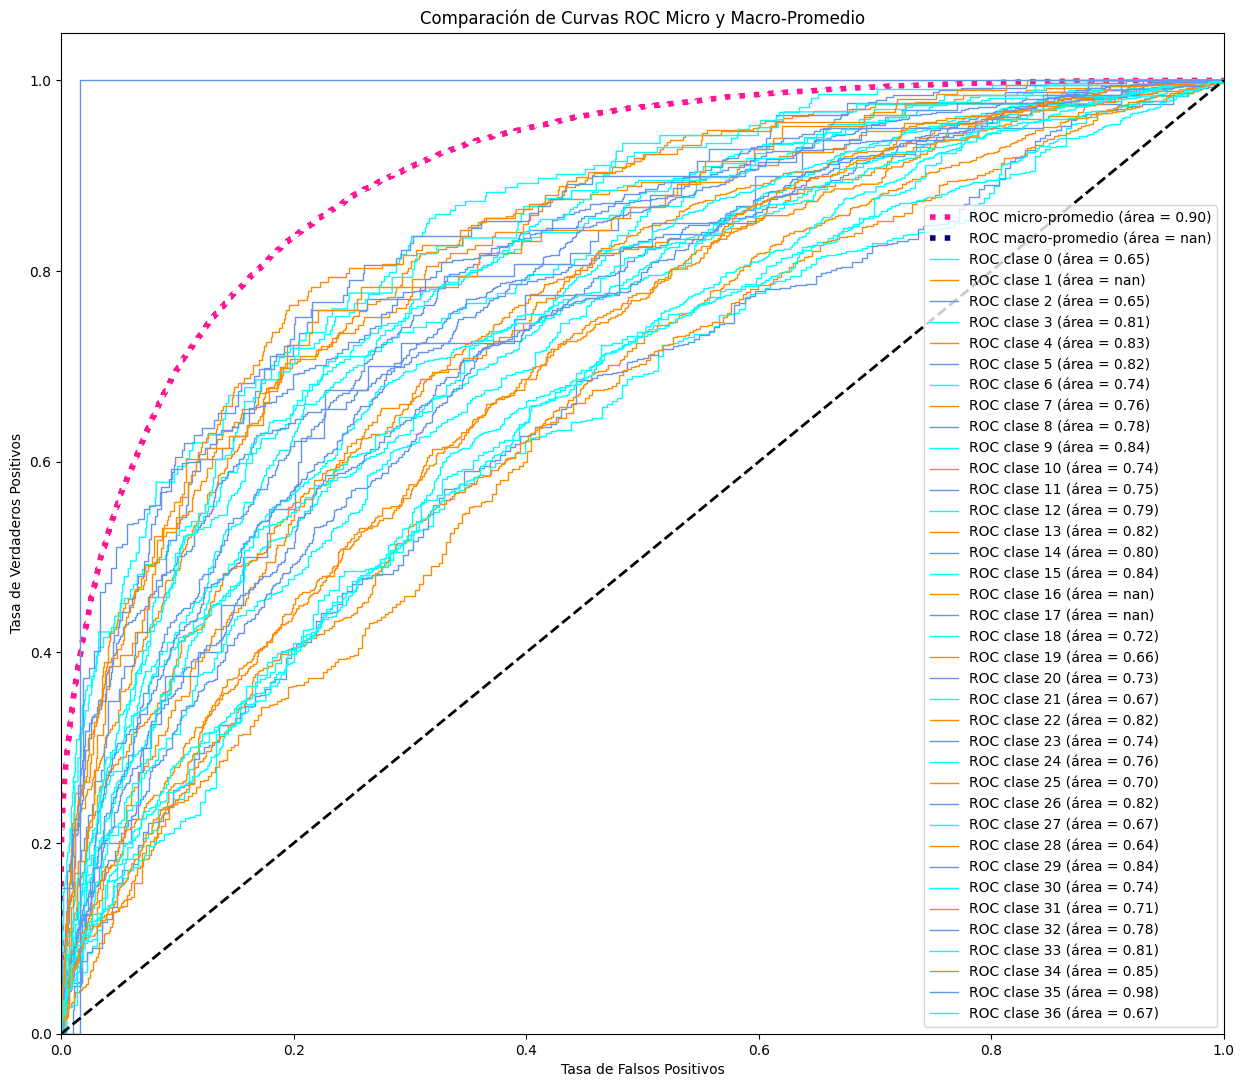

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Número de clases
n_classes = y_test_genres.shape[1]

# Calcular las curvas ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_genres[:, i], y_pred_genres_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la tasa de falsos positivos y verdaderos positivos micro-promedio
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_genres.ravel(), y_pred_genres_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Curva ROC Macro-Promedio
# Primero, agregamos todos los FPRs de todas las curvas
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Luego interpolar todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente, promediamos y calculamos el AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar todas las curvas
plt.figure(figsize=(15, 13))
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC micro-promedio (área = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='ROC macro-promedio (área = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC clase {0} (área = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC Micro y Macro-Promedio')
plt.legend(loc="lower right")
plt.show()
